# Names: Mohamed Gamal and Ahmed Maher
# Group 1

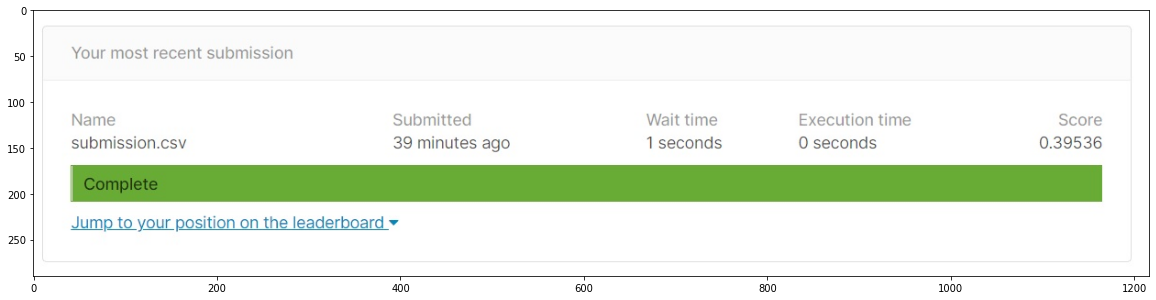

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

img = plt.imread("kaggle_score.jpg")
plt.imshow(img)


# Importing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Reading Files

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Data exploring

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train.drop(columns=['atemp'],inplace=True) # dropping these coulmns as casual and reistered lead to count and they are not found in the test data.
test.drop(columns=['atemp'],inplace=True) # drop temp as it close in value to atemp

In [8]:
train['holiday'].value_counts() 

0    10575
1      311
Name: holiday, dtype: int64

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

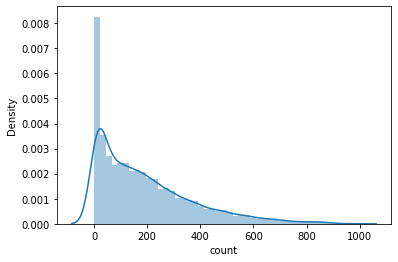

In [9]:
sns.distplot(train['count']) # the output is right skeweed 

In [10]:
# data outliers
outliers = train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]

print(outliers.head())
# maax point
max_allowed_t = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]['count'].max()
max_allowed_r = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]['registered'].max()
max_allowed_c = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]['casual'].max()



print("max allowed value of count: ", max_allowed_t)

                 datetime  season  holiday  workingday  weather   temp  \
6658  2012-03-14 17:00:00       1        0           1        1  28.70   
6659  2012-03-14 18:00:00       1        0           1        1  28.70   
6683  2012-03-15 18:00:00       1        0           1        1  27.06   
6779  2012-03-19 18:00:00       1        0           1        1  26.24   
6849  2012-04-03 17:00:00       2        0           1        1  25.42   

      humidity  windspeed  casual  registered  count  
6658        28     6.0032     140         642    782  
6659        32     0.0000     102         647    749  
6683        44    19.0012      98         648    746  
6779        57    16.9979     120         681    801  
6849        17    12.9980     123         634    757  
max allowed value of count:  734


In [11]:
#flooring outlier data to max point 
train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]['count']  = max_allowed_t
train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]['registered']  = max_allowed_r
train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]['casual']  = max_allowed_c


train['count'].max()


C:\Users\Maher\AppData\Local\Temp/ipykernel_17136/1438563066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]['count']  = max_allowed_t
C:\Users\Maher\AppData\Local\Temp/ipykernel_17136/1438563066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]['registered']  = max_allowed_r
C:\Users\Maher\AppData\Local\Temp/ipykernel_17136/1438563066.py:4: Sett

977

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

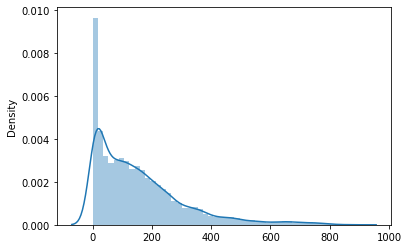

In [12]:
sns.distplot(x=train["registered"])

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

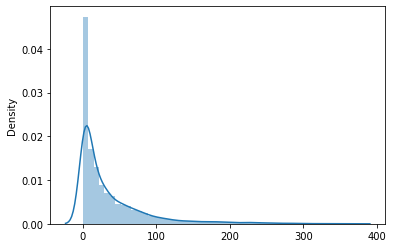

In [13]:
sns.distplot(x=train["casual"])

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

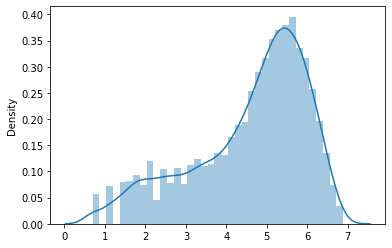

In [14]:
train['count_log']= np.log1p(train['count'])
sns.distplot(x=train["count_log"])

In [15]:
data  = pd.concat([train, test], ignore_index=True)

In [16]:
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3.0,13.0,16.0,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8.0,32.0,40.0,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5.0,27.0,32.0,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3.0,10.0,13.0,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0.0,1.0,1.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014,NaN,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014,NaN,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014,NaN,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981,NaN,NaN,NaN,NaN


# Preprocessing

In [17]:
data['datetime']=  pd.to_datetime(data['datetime'])


In [18]:
#changing datime to months,hours and weekdays

data['month']=data['datetime'].dt.month
data['hour']=data['datetime'].dt.hour
data['day']=data['datetime'].dt.day
data['year']=data['datetime'].dt.year
data['weekday']=data['datetime'].dt.weekday



In [19]:
data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
count_log     6493
month            0
hour             0
day              0
year             0
weekday          0
dtype: int64

In [20]:
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,count_log,month,hour,day,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3.0,13.0,16.0,2.833213,1,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8.0,32.0,40.0,3.713572,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5.0,27.0,32.0,3.496508,1,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3.0,10.0,13.0,2.639057,1,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0.0,1.0,1.0,0.693147,1,4,1,2011,5


In [21]:
data.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,count_log,month,hour,day,year,weekday
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,62.722884,12.736540,36.021955,155.552177,191.574132,4.591364,6.537775,11.546752,15.683411,2011.502561,3.011451
std,1.106918,0.167165,0.465431,0.639357,7.894801,19.292983,8.196795,49.960477,151.039033,181.144454,1.419454,3.438776,6.914405,8.789373,0.500008,2.001966
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,1.000000,0.000000,1.000000,2011.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,48.000000,7.001500,4.000000,36.000000,42.000000,3.761200,4.000000,6.000000,8.000000,2011.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,63.000000,12.998000,17.000000,118.000000,145.000000,4.983607,7.000000,12.000000,16.000000,2012.000000,3.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,78.000000,16.997900,49.000000,222.000000,284.000000,5.652489,10.000000,18.000000,23.000000,2012.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,6.885510,12.000000,23.000000,31.000000,2012.000000,6.000000


C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

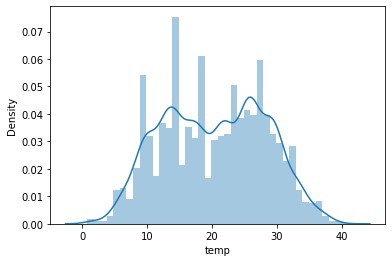

In [22]:
sns.distplot(data['temp'])

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

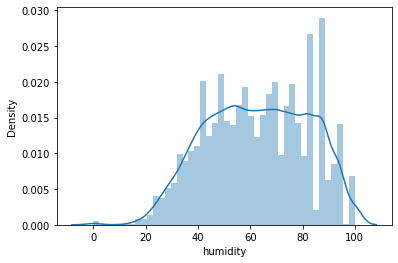

In [23]:
sns.distplot(data['humidity'])

C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

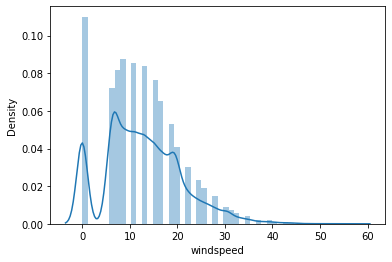

In [24]:
sns.distplot(data['windspeed'])

In [25]:
#fxing zero values in windspeed columns
fixed = data[data['windspeed'] != 0]
to_fix = data[data['windspeed'] == 0]

col = ['season', 'year', 'month', 'temp', 'weather', 'humidity']



In [26]:
fixed[col].isnull()

,season,year,month,temp,weather,humidity
5,False,False,False,False,False,False
10,False,False,False,False,False,False
11,False,False,False,False,False,False
12,False,False,False,False,False,False
13,False,False,False,False,False,False
...,...,...,...,...,...,...
17374,False,False,False,False,False,False
17375,False,False,False,False,False,False
17376,False,False,False,False,False,False
17377,False,False,False,False,False,False


In [27]:
#using rainforestment learning for predicting zero values
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(fixed[col], fixed['windspeed'])

pred = rf.predict(to_fix[col])

In [28]:
to_fix['windspeed'] = pred
data = pd.concat([fixed, to_fix]).sort_values('datetime')

C:\Users\Maher\AppData\Local\Temp/ipykernel_17136/3124113677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_fix['windspeed'] = pred


C:\Users\Maher\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

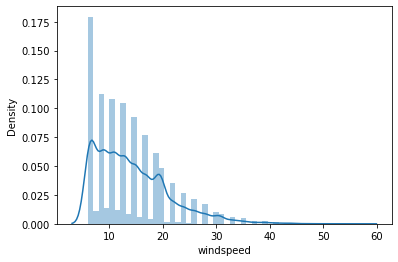

In [29]:
#checking xero values in windspeed
sns.distplot(data['windspeed'])

<AxesSubplot:xlabel='hour'>

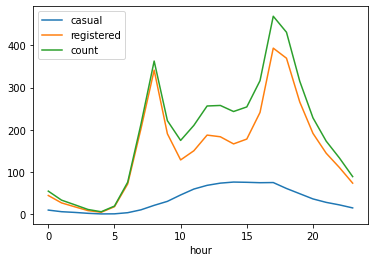

In [30]:
# we will try to see the trends in data 
agg_data= data.groupby(['hour'], as_index=True).agg({'casual':'mean','registered':'mean','count':'mean'})

agg_data.plot()                                                                    

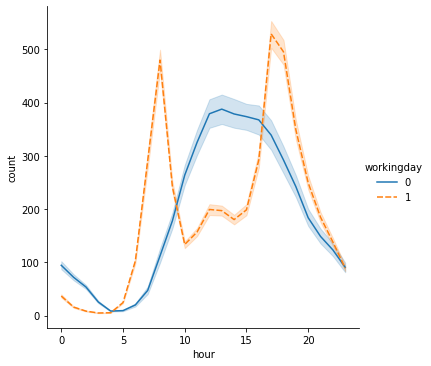

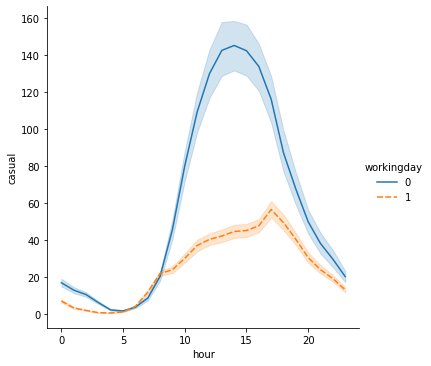

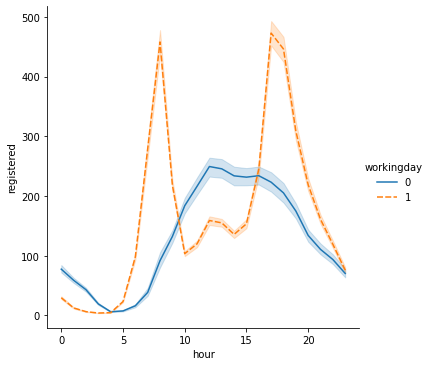

In [31]:
sns.relplot(x='hour', y='count', data=data, kind='line', style="workingday", hue="workingday")
sns.relplot(x='hour', y='casual', data=data, kind='line', style="workingday", hue="workingday")
sns.relplot(x='hour', y='registered', data=data, kind='line', style="workingday", hue="workingday")
plt.show()

<AxesSubplot:xlabel='temp'>

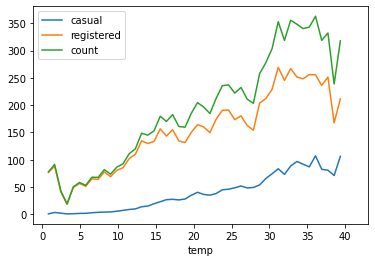

In [32]:
agg_data = data.groupby(['temp'], as_index=True).agg({'casual':'mean','registered':'mean','count':'mean'})
agg_data.plot()

<AxesSubplot:xlabel='humidity'>

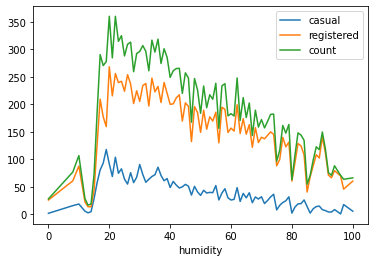

In [33]:
agg_data = data.groupby(['humidity'], as_index=True).agg({'casual':'mean','registered':'mean', 'count':'mean'})
agg_data.plot ()

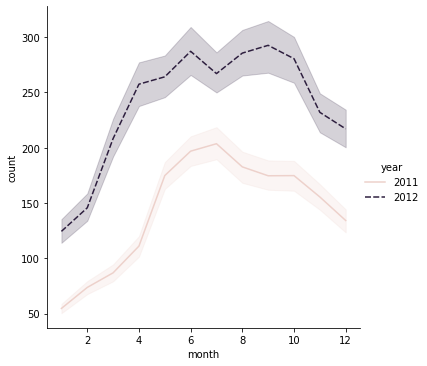

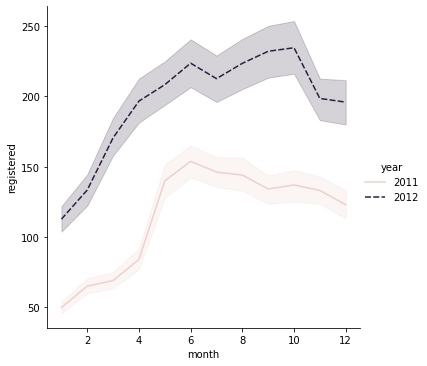

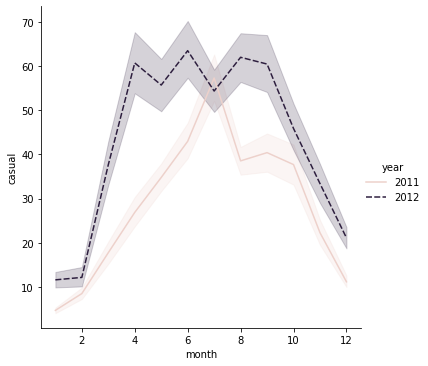

In [34]:
# agg_data= data.groupby(['month'], as_index=True).agg({'casual':'mean','registered':'mean','count':'mean'})

sns.relplot(data = data, x =data['month'], y = data['count'], kind='line', style = 'year', hue='year')
sns.relplot(data = data, x =data['month'], y = data['registered'], kind='line', style = 'year', hue='year')
sns.relplot(data = data, x =data['month'], y = data['casual'], kind='line', style = 'year', hue='year')

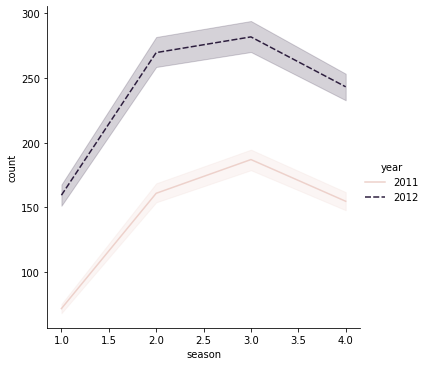

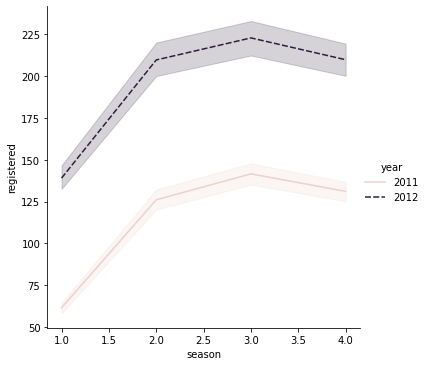

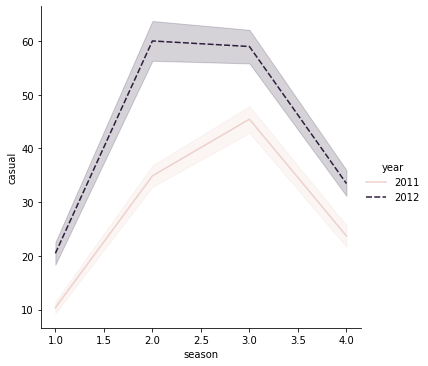

In [35]:
sns.relplot(data = data, x =data['season'], y = data['count'], kind='line', style = 'year', hue='year')
sns.relplot(data = data, x =data['season'], y = data['registered'], kind='line', style = 'year', hue='year')
sns.relplot(data = data, x =data['season'], y = data['casual'], kind='line', style = 'year', hue='year')

<AxesSubplot:xlabel='windspeed'>

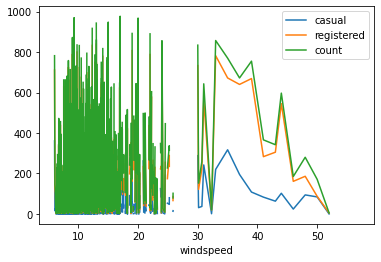

In [36]:
agg_data= data.groupby(['windspeed'], as_index=True).agg({'casual':'max','registered':'max', 'count':'max'})
agg_data.plot()

In [37]:
data = pd.get_dummies(data, columns = ['year'])


In [38]:

dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest= data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']

In [39]:
# dataTrain['ideal'] = dataTrain[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] >= 27 and x['windspeed'] <= 30], axis = 1)
# dataTest['ideal'] = dataTest[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] >= 27 and x['windspeed'] <= 30], axis = 1)

# dataTrain['bad'] = dataTrain[['weather', 'humidity']].apply(lambda x: (0, 1)[x['weather'] > 2 and x['humidity'] >50], axis = 1)
# dataTest['bad'] = dataTest[['weather', 'humidity']].apply(lambda x: (0, 1)[x['weather'] > 2 and x['humidity'] >50], axis = 1)

# dataTrain['peak'] = dataTrain[['workingday', 'hour']].apply(lambda x: (0, 1)[x['workingday']== 1 and ((x['hour'] >=7 and x['hour'] <=9) or (x['hour'] >=17 and x['hour'] <=19))], axis = 1)
# dataTest['peak'] = dataTest[['workingday', 'hour']].apply(lambda x: (0, 1)[x['workingday']== 1 and ((x['hour'] >=7 and x['hour'] <=9) or (x['hour'] >=17 and x['hour'] <=19))], axis = 1)

In [40]:
# As noticed from observation each of casual and registered customer have its own trend
#So we will predict each of them individually and we will sum them to get the count
#casual + registered = count



#Transforming each of causal and registered columns
for col in ['casual', 'registered']:
    dataTrain['%s_log' % col] = np.log1p(dataTrain[col])

dataTrain['registered_log']    

0        2.639057
1        3.496508
2        3.332205
3        2.397895
4        0.693147
           ...   
10881    5.799093
10882    5.446737
10883    5.105945
10884    4.770685
10885    4.442651
Name: registered_log, Length: 10886, dtype: float64

In [41]:
#method for calculating r2score and Root mean square log error
def get_rmsle_r2_score(y_pred, y_actual):
    diff = np.log1p(y_pred) - np.log1p(y_actual)
    mean_error = np.square(diff).mean()
    print("r2_score: ", r2_score(y_actual, y_pred))
    print("RMSLE", np.sqrt(mean_error))

In [42]:
#spliting function to split the target from the data
def prep_data(data, input_cols):
    X = data[input_cols]
    y_r = data['registered_log']
    y_c = data['casual_log']
    return X, y_r, y_c

In [43]:
#parameters to test with
params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf = RandomForestRegressor(**params)
cols = [
    'weather', 'temp', 'windspeed','year_2011','year_2012',
    'workingday', 'season', 'holiday', 'hour', 
    'weekday'
]
train, test = train_test_split(dataTrain, random_state= 0)
X_train, y_train_r, y_train_c = prep_data(train, cols)
X_test, y_test_r, y_test_c = prep_data(test, cols)

model_r = rf.fit(X_train, y_train_r)
y_pred_r = np.expm1(model_r.predict(X_test)) 

model_c = rf.fit(X_train, y_train_c)
y_pred_c = np.expm1(model_c.predict(X_test)) 

y_pred_count = np.round(y_pred_r + y_pred_c)

#the minimum count of bikes is 1 in the training data
y_pred_count[y_pred_count < 1] = 1

y_test_comb = np.expm1(y_test_r) + np.expm1(y_test_c) 

get_rmsle_r2_score(y_pred_count, y_test_comb)



r2_score:  0.9332537960668261
RMSLE 0.31860390070288447


In [44]:
model_r_2 = rf.fit(dataTrain[cols], dataTrain['registered_log'])
y_pred_r_2 = np.expm1(model_r_2.predict(dataTest[cols])) 

model_c_2 = rf.fit(dataTrain[cols], dataTrain['casual_log'])
y_pred_c_2 = np.expm1(model_c_2.predict(dataTest[cols])) 

y_pred_count_2 = np.round(y_pred_r_2 + y_pred_c_2)
y_pred_count_2[y_pred_count_2 < 1] = 1



In [45]:
dataTest['count'] = y_pred_count_2
final_df = dataTest[['datetime', 'count']].copy()
final_df

,datetime,count
10886,2011-01-20 00:00:00,11.0
10887,2011-01-20 01:00:00,5.0
10888,2011-01-20 02:00:00,2.0
10889,2011-01-20 03:00:00,2.0
10890,2011-01-20 04:00:00,2.0
...,...,...
17374,2012-12-31 19:00:00,233.0
17375,2012-12-31 20:00:00,162.0
17376,2012-12-31 21:00:00,109.0
17377,2012-12-31 22:00:00,89.0


In [46]:
final_df.to_csv('submission.csv', index=False)